# MNIST: a classic real-world use case

In this notebook, you will apply a Multi-Layer Perceptron to the famous MNIST dataset. You will have a chance to play around with different training techniques, and see how they influence the results your MLP will obtain.

## 1. Setting up the environment
As usual, the first step is to load all needed libraries. We are using the MNIST dataset, which is automatically downloaded by Keras when needed, through the `keras.datasets` module. We will not need `scikit-learn`, and we will find pre-processing routines in Keras and NumPy.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

from __future__ import print_function

import keras
from keras.datasets import mnist

Using TensorFlow backend.


## 2. The data: MNIST dataset
From [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database):

>The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

>The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. 

In Keras, we can load the MNIST dataset using a built-in function, which will automatically load both training and test dataset. The one-hot-encoded versions of `y_train_original` and `y_test` are obtained with `keras.utils.to_categorical`. You need to define `n_classes`, i.e. the number of labels we are classifying our samples into. Since we are dealing with hand-written digits, you might guess what value you have to assign to `n_classes`, otherwise, you can explore `y`. 

In [2]:
# the data, split between train and test sets
(X_train_original, y_train_original), (X_test, y_test) = mnist.load_data()

# TODO assign the right value to num_classes, i.e. the number of different labels of our samples
n_classes = 10
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train_original, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

As usual, we need to extract some useful information from the data and check that the datasets have the shape we expect. We are interested in four values:

- `n_train_samples`: the number of samples in our training set
- `img_rows`: the number of rows in one image sample
- `img_cols`: the number of columns in one image sample
- `n_test_samples`: the number of samples in our test set

In [3]:
# TODO: assign the right values to the following variables
n_train_samples = X_train_original.shape[0]
img_rows = X_train_original.shape[1]
img_cols = X_train_original.shape[2]
n_test_samples  = X_test.shape[0]

print("Training dataset: {} images, each one of size {}x{} pixels".format(n_train_samples, img_rows, img_cols))
print("Test dataset: {} images".format(n_test_samples))

Training dataset: 60000 images, each one of size 28x28 pixels
Test dataset: 10000 images


# 3. Preprocessing the data
MLPs only accept vectors (or, if they accept matrices, they treat them as vectors). Since our samples are 2D gray scale images, thus matrices, we need to reshape them. To do this, we will use the NumPy function `reshape`. Every image will be turned into a vector: its size must be equal to the number of pixels contained in one image. Can you assign the right value to `img_pixels`, in the code block below?

In [4]:
# TODO assign the right value to the vectorized image
img_pixels = img_rows*img_cols
X_train = X_train_original.reshape(n_train_samples, img_pixels)
X_test = X_test.reshape(n_test_samples, img_pixels)

Time to scale the data. In this case, the original images are given as 8-bit integers (`0`-`255`), thus we first cast them to floating point numbers, and then scale them to be in the `0`-`1` range.

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 4. Visualizing the data
Now that you have prepared the data, why not look into it? 

Let us plot some samples! We suggest you use the function `plt.imshow` as shown in the following code block. Remember to use the samples stored in `x_train_original`, and not their vectorized counterparts (stored in `x_train`), as the latter do not look very interesting when plotted! Addd a title to the image you plot (with `plt.title("YOUR TITLE")`), and use it to display the sample label.


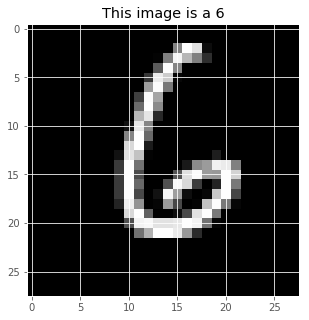

In [6]:
plt.figure(figsize=(5,5))

#TODO  assign a sample to this variable 
# (or put this into a loop and use it with subplot, as in the previous notebook, to see more samples at once)

sample = X_train_original[32]
plt.imshow(sample,cmap='gray')
sample_label = y_train_original[32]
plt.title("This image is a " + str(sample_label) ); #The semicolon suppreses text output


## 5. Applying Neural Networks to the problem

Alright! Time to use Neural Networks again! As usual, you decide how to shape the network. Some suggestions:

- Input and output layers are already written for you, just assign the right values to input and output dimensions.
- Dense layers should have a number of nodes similar (not necessarily equal) to the input size
- Start with dense layers only. Use `'relu'` as activation function.

After you've defined your network, you will have to `compile` the model (look at the previous notebook if you do not remember how!).

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam

nodes = 512

#TODO assign input and output dimensions
input_dimension = img_pixels
output_dimension = n_classes
dropout_prob = 0.2

model = Sequential()
# Input layer
model.add(Dense(nodes, activation='relu', input_dim=input_dimension))
# TODO add hidden layers
model.add(Dropout(0.2))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(output_dimension, activation='softmax'))

model.name= "MNIST_MLP"
model.summary()

# TODO: compile the model. As metrics we use accuracy,
#       as loss we use categorical_crossentropy
#       as optimizer we start with SGD, which we simply
#       instantiate with default parameters, by writing
#       optimizer=SGD() or optimizer='sgd'
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
__________

Now, it's training time! Define some easy hyper-parameters, such as `batch_size` and `epochs`. Then call `model.fit`... again, if you don't remember how, look at the previous notebook!

Then, once the training is finished, we print the test score. Is it good? Does it satisfy you? We will look at some more details in the next blocks.

In [8]:
batch_size = 32
epochs = 20

# TODO: call the fit function, you have all needed parameters!
history_callback = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.7745 - acc: 0.7614 - val_loss: 0.2730 - val_acc: 0.9177
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.3065 - acc: 0.9083 - val_loss: 0.1880 - val_acc: 0.9438
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2259 - acc: 0.9328 - val_loss: 0.1470 - val_acc: 0.9547
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1823 - acc: 0.9455 - val_loss: 0.1233 - val_acc: 0.9620
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1545 - acc: 0.9539 - val_loss: 0.1065 - val_acc: 0.9671
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1367 - acc: 0.9594 - val_loss: 0.0981 - val_acc: 0.9708
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1187 - acc: 0.9640 - val_loss: 0.0912 - val_ac

First of all, once you've trained a network, you might want to use it in _inference mode_.

To do this, we can use `model.predict(sample)`: as input, it requires an array of samples, thus, if you only want to give it one sample (the $n$th sample), you will have to take a slice of an array, like `X_train[n:(n+1)]`. Can you interpret the output? And can you get the predicted label from it?

Optional: find a sample for which the prediction is wrong and plot it. Why you think it was mis-classified?

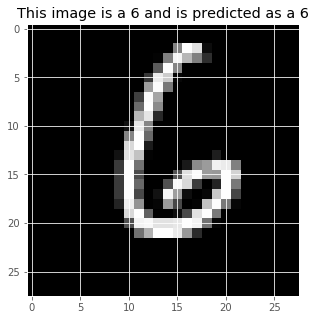

In [9]:
plt.figure(figsize=(5, 5))

array_slice = X_train[32:33]
prediction = model.predict(array_slice)

plt.imshow(X_train_original[32,:,:],cmap='gray')
plt.title("This image is a "+str(y_train_original[32]) + " and is predicted as a " +
          str(np.argmax(prediction)));


Now we need to see how the training effectively went. Use `history_callback` to look at training and validation accuracy. Try to answer the following questions:

- Did the model over- or underfit the data?
- Do you think that training for more epochs would help?

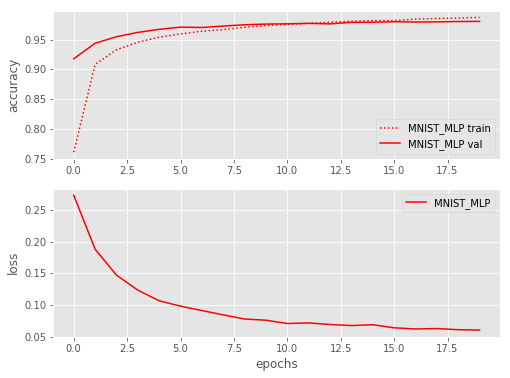

In [10]:
#TODO: adapt the code from the previous notebook and plot accuracy and loss for training and test set

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

colorstring = "rgbcmk"

train_acc = history_callback.history['acc']
train_loss = history_callback.history['loss']
val_acc = history_callback.history['val_acc']
val_loss = history_callback.history['val_loss']
ax1.plot(train_acc, colorstring[0]+':', label=model.name+" train")
ax1.plot(val_acc, colorstring[0], label=model.name+" val")
ax2.plot(val_loss, colorstring[0], label=model.name)

ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

Go back to the previous code blocks and modify them, trying to achieve a better (or faster) result. Some suggestions:

- how large can the batch size be? How does it influence the achieved accuracy?
- how many epochs should you train for?
- what optimizer should you use? We imported a bunch of different optimizers, but you can find more in the [_Optimizers_ section of the docs](https://keras.io/optimizers/)!
- if your model overfits, you can either reduce the number of hidden layers, or add a dropout layer after each dense layer. It is as easy as writing `model.add(Dropout(dropout_prob))` after each dense layer!